# Part 1: Data Exploration

1. Read in the dataset, and display some summaries of the data.

2. Fix any concerns you have about the data.

3. Make up to three plots comparing the response variable (charges) to one of the predictor variables. Briefly discuss each plot.

In [62]:
#import packages
import pandas as pd
import numpy as np
from plotnine import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import statsmodels.formula.api as smf
#read in the data
data = pd.read_csv("/Users/stolieerickson/Documents/MSBA/Fall/GSB544-Computing/Labs/insurance_costs_1.csv")
data.head()
#summary statistics
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(data.describe())
#variable data types
print(data.dtypes)
#create necessary dummy variables
data_clean = pd.get_dummies(data, columns=["sex", "smoker", "region"], drop_first=True)
#missing values
print(data_clean.isnull().sum())

              age         bmi  \
count  431.000000  431.000000   
mean    37.960557   30.768898   
std     16.363909    6.111362   
min     18.000000   15.960000   
25%     22.000000   26.357500   
50%     34.000000   30.590000   
75%     55.000000   35.272500   
max     64.000000   49.060000   

            charges  
count    431.000000  
mean   12297.098118  
std    11876.527128  
min     1131.506600  
25%     2710.444575  
50%     9866.304850  
75%    14510.872600  
max    55135.402090  
age          int64
sex         object
bmi        float64
smoker      object
region      object
charges    float64
dtype: object
age                 0
bmi                 0
charges             0
sex_male            0
smoker_yes          0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64
              age         bmi  \
count  431.000000  431.000000   
mean    37.960557   30.768898   
std     16.363909    6.111362   
min     18.000000   15.960000   
25%     22.000000   26

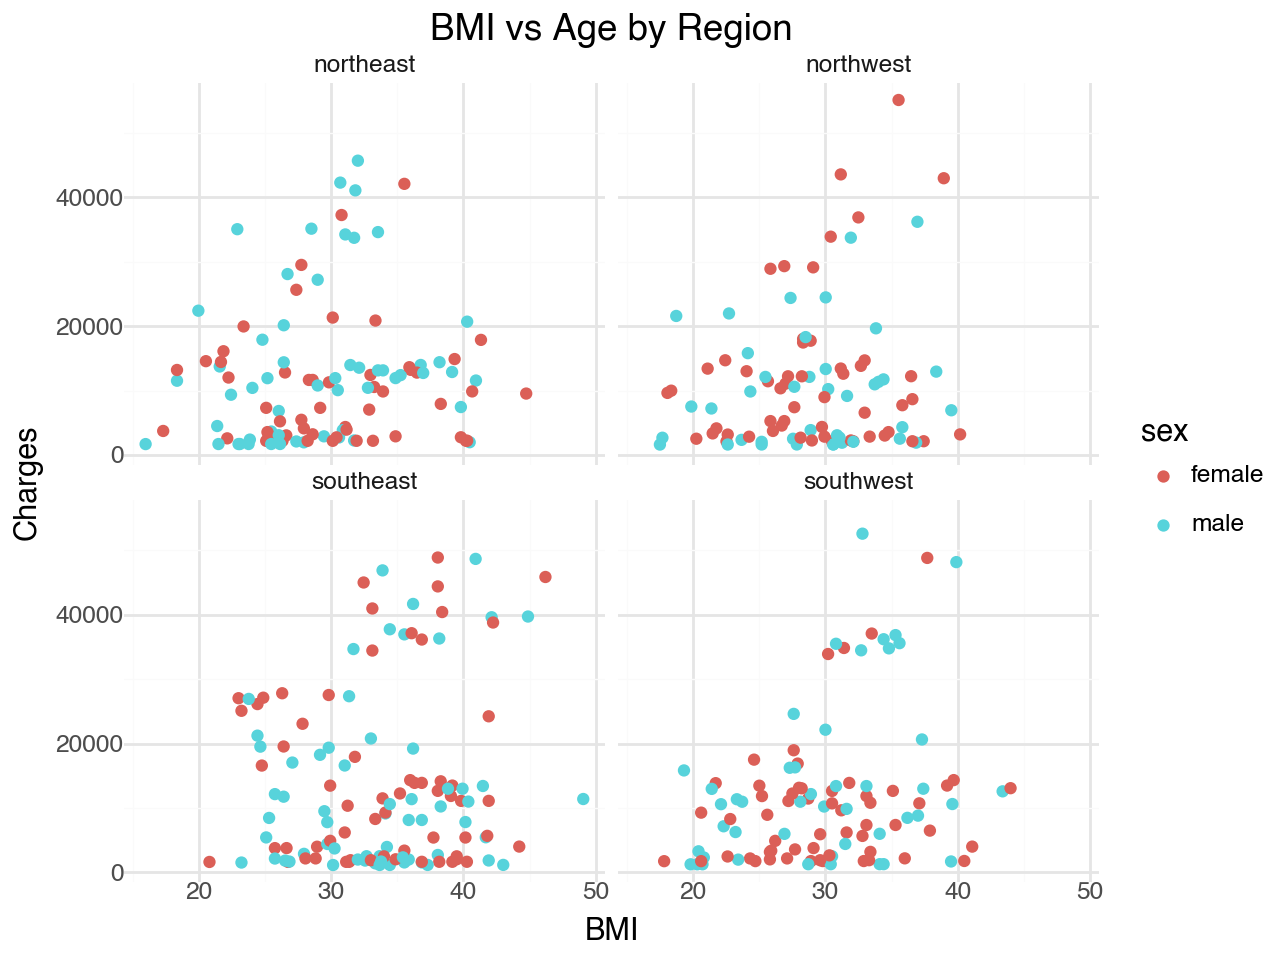

In [21]:
#bmi vs charges by region and sex
(ggplot(data, aes(x="bmi", y="charges", color = "sex")) 
    + geom_point()
    + facet_wrap("region")
    + labs(title="BMI vs Age by Region", 
           x="BMI", y="Charges")
    + theme_minimal())

The plot depicting BMI vs. Charges by Region and Sex illustrates a notable pattern: there appears to be a similar relationship between BMI and medical charges across all regions. As BMI increases, we observe a fanning effect, indicating that the variance in charges also increases. This suggests that higher BMI is associated with higher medical costs, and the range of charges becomes broader for individuals with higher BMI values. This insight highlights the potential impact of body mass on healthcare expenses, which may vary not only by individual characteristics but also by geographic location.

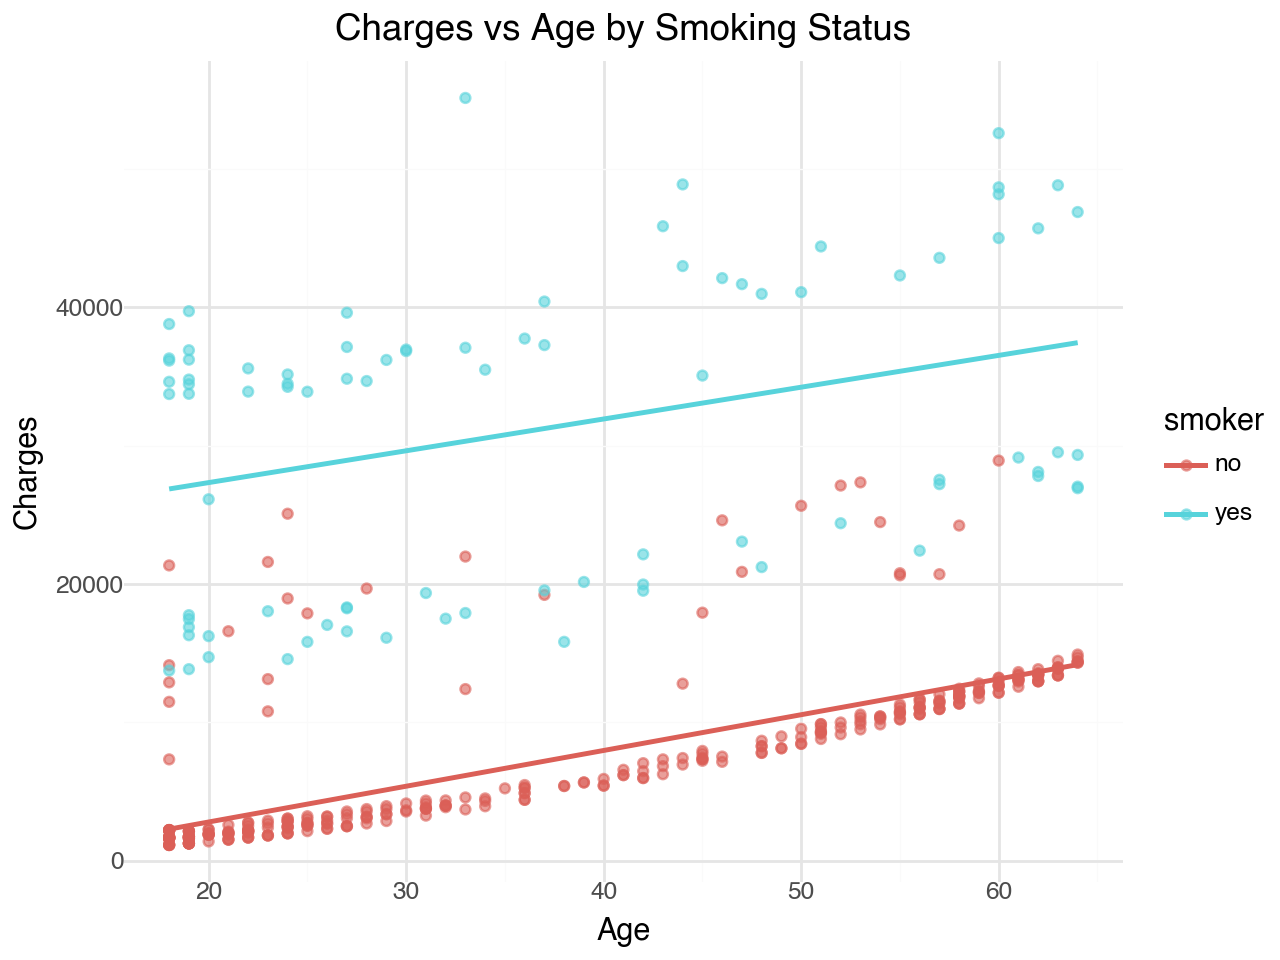

In [19]:
#age vs charges by smoking status
(ggplot(data, aes(x="age", y="charges", color="smoker"))
    + geom_point(alpha=0.6)
    + geom_smooth(method="lm", se=False)
    + labs(title="Charges vs Age by Smoking Status", 
           x="Age", y="Charges")
    + theme_minimal())

The plot illustrating Charges vs. Age by Smoking Status reveals that smokers incur significantly higher medical charges than non-smokers, as indicated by the noticeable gap between the two lines. Most non-smokers have smaller charges, but there are a few outlier observations among non-smokers with higher charges, which are pulling up the regression line.

Additionally, as age increases, charges appear to rise for both smokers and non-smokers. This trend suggests that older individuals, regardless of smoking status, tend to face higher medical expenses, potentially reflecting the increased healthcare needs associated with aging.

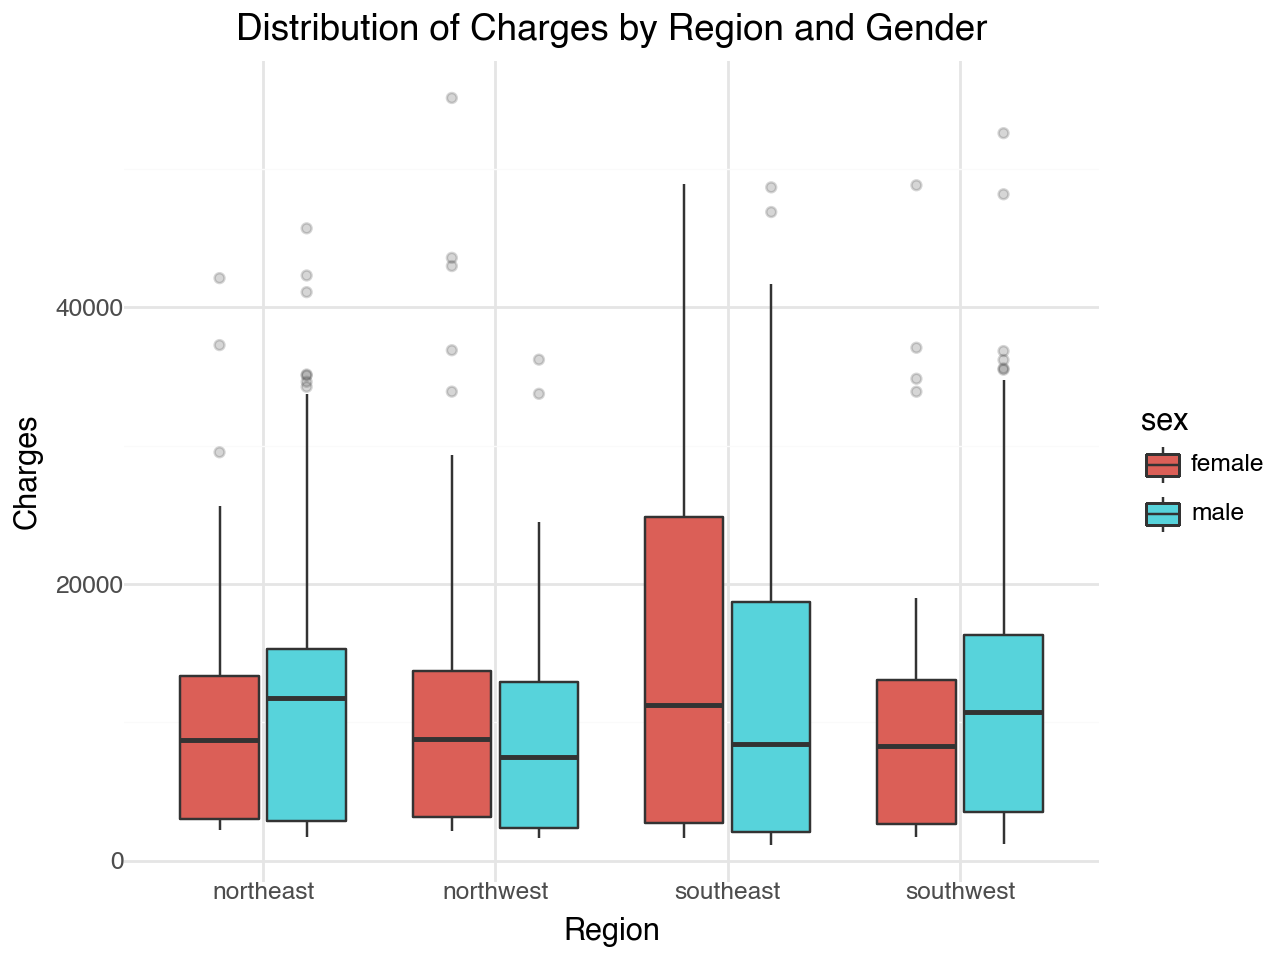

In [24]:
(ggplot(data, aes(x="region", y="charges", fill="sex"))
    + geom_boxplot(outlier_alpha=0.2)
    + labs(title="Distribution of Charges by Region and Gender", 
           x="Region", y="Charges")
    + theme_minimal())

The boxplot illustrating Charges by Region and Gender shows that the Southeast region has the highest spread of medical charges overall, as well as significant variation between sexes. Outliers with extremely high charges are present across all regions, indicating considerable variability in healthcare costs.

Furthermore, the median charges for females are higher than those for males in the Northeast and Southwest regions. Conversely, in the Northwest and Southeast regions, the median charges for males exceed those of females. This indicates potential regional disparities in healthcare costs based on gender, suggesting that both regional location and sex play a significant role in determining medical expenses.

# Part 2: Simple Linear Models

1. Construct a simple linear model to predict the insurance charges from the beneficiary’s age. Discuss the model fit, and interpret the coefficient estimates.

In [33]:
#model1 variables
X1 = data_clean[['age']]
y = data_clean['charges']

#split with seed
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=1)

#fit model1
model1 = LinearRegression()
model1.fit(X1_train, y_train)

#model1 summary
train_pred1 = model1.predict(X1_train)
test_pred1 = model1.predict(X1_test)
mse_train1 = mean_squared_error(y_train, train_pred1)
mse_test1 = mean_squared_error(y_test, test_pred1)
r2_train1 = r2_score(y_train, train_pred1)
r2_test1 = r2_score(y_test, test_pred1)
#print
print("Model 1 Summary (Age only):")
print(f"Intercept: {model1.intercept_:.2f}")
print(f"Coefficient for Age: {model1.coef_[0]:.2f}")
print(f"Training MSE: {mse_train1:.2f}, Training R^2: {r2_train1:.2f}")
print(f"Test MSE: {mse_test1:.2f}, Test R^2: {r2_test1:.2f}\n")

Model 1 Summary (Age only):
Intercept: 3769.22
Coefficient for Age: 231.67
Training MSE: 136790047.54, Training R^2: 0.09
Test MSE: 87360446.32, Test R^2: 0.12

Model 1 Summary (Age only):
Intercept: 3769.22
Coefficient for Age: 231.67
Training MSE: 136790047.54, Training R^2: 0.09
Test MSE: 87360446.32, Test R^2: 0.12



The regression model is: $\hat{\text{Charges}} = 3769.22 + 231.67Age$ The R squared on the test set is 0.12. This means that 12% of the variation in charges is explained by the model using only age as a predictor variable. Because we do not have another model (yet) to compare the MSE to, we cannot make judgements on whether this is a "good" fit or not. The interpretation of the intercept: 3769.22 is the expected or estimated medical charge for an individual with an age of 0, which does not make sense to interpret (we do not observe patients with an age of 0). The interpretation of age is: For each additional year of age, charges are expected to increase by $231.67 on average. 

2. Make a model that also incorporates the variable sex. Report your results.

In [29]:
#model2 additional variable
X2 = data_clean[['age', 'sex_male']]

#same split for model2
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=1)

#fit model2
model2 = LinearRegression()
model2.fit(X2_train, y_train)

#summarize
train_pred2 = model2.predict(X2_train)
test_pred2 = model2.predict(X2_test)
mse_train2 = mean_squared_error(y_train, train_pred2)
mse_test2 = mean_squared_error(y_test, test_pred2)
r2_train2 = r2_score(y_train, train_pred2)
r2_test2 = r2_score(y_test, test_pred2)
#print
print("Model 2 Summary (Age and Sex):")
print(f"Intercept: {model2.intercept_:.2f}")
print(f"Coefficient for Age: {model2.coef_[0]:.2f}")
print(f"Coefficient for Sex (Male): {model2.coef_[1]:.2f}")
print(f"Training MSE: {mse_train2:.2f}, Training R^2: {r2_train2:.2f}")
print(f"Test MSE: {mse_test2:.2f}, Test R^2: {r2_test2:.2f}")


Model 2 Summary (Age and Sex):
Intercept: 3331.48
Coefficient for Age: 231.51
Coefficient for Sex (Male): 936.42
Training MSE: 136571435.09, Training R^2: 0.10
Test MSE: 87817757.43, Test R^2: 0.11
Model 2 Summary (Age and Sex):
Intercept: 3331.48
Coefficient for Age: 231.51
Coefficient for Sex (Male): 936.42
Training MSE: 136571435.09, Training R^2: 0.10
Test MSE: 87817757.43, Test R^2: 0.11


3. Now make a model that does not include sex, but does include smoker. Report your results.

In [38]:
#model3 additional variable
X3 = data_clean[['age', 'smoker_yes']]

#same split for model3
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=1)

#fit model3
model3 = LinearRegression()
model3.fit(X3_train, y_train)

#summarize
train_pred3 = model3.predict(X3_train)
test_pred3 = model3.predict(X3_test)
mse_train3 = mean_squared_error(y_train, train_pred3)
mse_test3 = mean_squared_error(y_test, test_pred3)
r2_train3 = r2_score(y_train, train_pred3)
r2_test3 = r2_score(y_test, test_pred3)
#print
print("Model 3 Summary (Age and Smoker):")
print(f"Intercept: {model3.intercept_:.2f}")
print(f"Coefficient for Age: {model3.coef_[0]:.2f}")
print(f"Coefficient for Smoker (Yes): {model3.coef_[1]:.2f}")
print(f"Training MSE: {mse_train3:.2f}, Training R^2: {r2_train3:.2f}")
print(f"Test MSE: {mse_test3:.2f}, Test R^2: {r2_test3:.2f}")

Model 3 Summary (Age and Smoker):
Intercept: -1948.08
Coefficient for Age: 247.45
Coefficient for Smoker (Yes): 25170.80
Training MSE: 34166961.28, Training R^2: 0.77
Test MSE: 33276382.05, Test R^2: 0.66
Model 3 Summary (Age and Smoker):
Intercept: -1948.08
Coefficient for Age: 247.45
Coefficient for Smoker (Yes): 25170.80
Training MSE: 34166961.28, Training R^2: 0.77
Test MSE: 33276382.05, Test R^2: 0.66


4. Which model (Q2 or Q3) do you think better fits the data? Justify your answer by calculating the MSE for each model, and also by comparing R-squared values.

I think that Model3 (the model that includes Age and Smoker as predictor variables) better fits the data. The R squared for Model2 is 0.11, while the R squared for Model3 is 0.66. Additionally, the test MSE for Model3 is smaller than the test MSE for Model2. Finally, we saw from the preliminary plots that whether or not the patient was a smoker appeared to have an extremely strong influence on the charges incurred, compared to the sex of the patient.

# Part 3: Multiple Linear Models

1. Fit a model that uses age and bmi as predictors. (Do not include an interaction term, age*bmi, between these two.) Report your results. How does the MSE compare to the model in Part Two Q1? How does the R-squared compare?

In [39]:
#model4 additional variable
X4 = data_clean[['age', 'bmi']]

#same split for model3
X4_train, X4_test, y_train, y_test = train_test_split(X4, y, test_size=0.2, random_state=1)

#fit model3
model4 = LinearRegression()
model4.fit(X4_train, y_train)

#summarize
train_pred4 = model4.predict(X4_train)
test_pred4 = model4.predict(X4_test)
mse_train4 = mean_squared_error(y_train, train_pred4)
mse_test4 = mean_squared_error(y_test, test_pred4)
r2_train4 = r2_score(y_train, train_pred4)
r2_test4 = r2_score(y_test, test_pred4)
#print
print("Model 4 Summary (Age and BMI):")
print(f"Intercept: {model4.intercept_:.2f}")
print(f"Coefficient for Age: {model4.coef_[0]:.2f}")
print(f"Coefficient for BMI: {model4.coef_[1]:.2f}")
print(f"Training MSE: {mse_train4:.2f}, Training R^2: {r2_train4:.2f}")
print(f"Test MSE: {mse_test4:.2f}, Test R^2: {r2_test4:.2f}")

Model 4 Summary (Age and BMI):
Intercept: -4118.93
Coefficient for Age: 213.52
Coefficient for BMI: 274.78
Training MSE: 133997790.55, Training R^2: 0.11
Test MSE: 83569014.93, Test R^2: 0.15
Model 4 Summary (Age and BMI):
Intercept: -4118.93
Coefficient for Age: 213.52
Coefficient for BMI: 274.78
Training MSE: 133997790.55, Training R^2: 0.11
Test MSE: 83569014.93, Test R^2: 0.15


The test MSE in Part Two Q1 was 87360446.32, and the test MSE for this model is 83569014.93, meaning that Model4 is preferred over Model1 (because it has a smaller MSE). The R squared in Model1 was .11, and the R squared for Model4 is 0.15. However, we cannot compare these models on the basis of regular R squared becuase they have different number of predictor variables.

2. Perhaps the relationships are not linear. Fit a model that uses age and age^2 as predictors. How do the MSE and R-squared compare to the model in P2 Q1?

In [42]:
#model5 variables
X = data_clean[['age']]
y = data_clean['charges']

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#pipeline for polynomial and regression applied
model5 = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('linear_regression', LinearRegression())
])

#fit the model
model5.fit(X_train, y_train)

#predictions and evaluation metrics
train_pred5 = model5.predict(X_train)
test_pred5 = model5.predict(X_test)
mse_train5 = mean_squared_error(y_train, train_pred5)
mse_test5 = mean_squared_error(y_test, test_pred5)
r2_train5 = r2_score(y_train, train_pred5)
r2_test5 = r2_score(y_test, test_pred5)

#extracting coefficients and intercept
linear_model = model5.named_steps['linear_regression']
poly_features = model5.named_steps['poly_features']

#coefficients for age and age^2
age_coef = linear_model.coef_[0]  # coefficient for age
age_squared_coef = linear_model.coef_[1]  # coefficient for age^2

#print summary
print("Model 5 Summary (Polynomial Regression with Age and Age Squared):")
print(f"Intercept: {linear_model.intercept_:.2f}")
print(f"Coefficient for Age: {age_coef:.2f}")
print(f"Coefficient for Age^2: {age_squared_coef:.2f}")
print(f"Training MSE: {mse_train5:.2f}, Training R^2: {r2_train5:.2f}")
print(f"Test MSE: {mse_test5:.2f}, Test R^2: {r2_test5:.2f}")

Model 5 Summary (Polynomial Regression with Age and Age Squared):
Intercept: 3979.93
Coefficient for Age: 218.86
Coefficient for Age^2: 0.16
Training MSE: 136789294.88, Training R^2: 0.09
Test MSE: 87413315.31, Test R^2: 0.12
Model 5 Summary (Polynomial Regression with Age and Age Squared):
Intercept: 3979.93
Coefficient for Age: 218.86
Coefficient for Age^2: 0.16
Training MSE: 136789294.88, Training R^2: 0.09
Test MSE: 87413315.31, Test R^2: 0.12


The MSE for this model is 87413315.31 and the test MSE for the model in part two question 1 is 87360446.32. The test R squared for model1 was 0.12, and the test R squared for this model is also 0.12. However, we cannot compare these models on the basis of R squared because they have different number of predictor variables. Theoretically, adjusted R squared would penalize for having additional predictor variables, and Model5 has a larger MSE, making it worse than Model1.

3. Fit a polynomial model of degree 4. How do the MSE and R-squared compare to the model in P2 Q1?

In [47]:
#model6 variables
X = data_clean[['age']]
y = data_clean['charges']

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#polynomial 4
model6 = Pipeline([
    ('poly_features', PolynomialFeatures(degree=4, include_bias=False)),
    ('linear_regression', LinearRegression())
])

#fit the model
model6.fit(X_train, y_train)

#predictions and evaluation metrics
train_pred6 = model6.predict(X_train)
test_pred6 = model6.predict(X_test)
mse_train6 = mean_squared_error(y_train, train_pred6)
mse_test6 = mean_squared_error(y_test, test_pred6)
r2_train6 = r2_score(y_train, train_pred6)
r2_test6 = r2_score(y_test, test_pred6)

#intercept and coefficients
linear_model6 = model6.named_steps['linear_regression']

#extract coefficients
coefficients6 = linear_model6.coef_

#summary
print("Model 6 Summary (Polynomial Regression with Age up to Age^4):")
print(f"Intercept: {linear_model6.intercept_:.2f}")
for i, coef in enumerate(coefficients6):
    print(f"Coefficient for Age^{i + 1}: {coef:.2f}")
print(f"Training MSE: {mse_train6:.2f}, Training R^2: {r2_train6:.2f}")
print(f"Test MSE: {mse_test6:.2f}, Test R^2: {r2_test6:.2f}")


Model 6 Summary (Polynomial Regression with Age up to Age^4):
Intercept: 72752.56
Coefficient for Age^1: -8187.23
Coefficient for Age^2: 359.32
Coefficient for Age^3: -6.38
Coefficient for Age^4: 0.04
Training MSE: 135773899.30, Training R^2: 0.10
Test MSE: 85868140.40, Test R^2: 0.13
Model 6 Summary (Polynomial Regression with Age up to Age^4):
Intercept: 72752.56
Coefficient for Age^1: -8187.23
Coefficient for Age^2: 359.32
Coefficient for Age^3: -6.38
Coefficient for Age^4: 0.04
Training MSE: 135773899.30, Training R^2: 0.10
Test MSE: 85868140.40, Test R^2: 0.13


The MSE for this model is 85,868,140.40 and the test MSE for the model in part two question 1 is 87,360,446.32. The test R squared for Model1 was 0.12, and the test R squared for this model is 0.13. However, we cannot compare these models on the basis of R squared because they have different number of predictor variables. Model6 has a smaller test MSE, so it is considered the preferred model.

4. Fit a polynomial model of degree 12. How do the MSE and R-squared compare to the model in P2 Q1?

In [48]:
#model7 variables
X = data_clean[['age']]
y = data_clean['charges']

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#polynomial 12
model7 = Pipeline([
    ('poly_features', PolynomialFeatures(degree=12, include_bias=False)),
    ('linear_regression', LinearRegression())
])

#fit the model
model7.fit(X_train, y_train)

#predictions and evaluation metrics
train_pred7 = model7.predict(X_train)
test_pred7 = model7.predict(X_test)
mse_train7 = mean_squared_error(y_train, train_pred7)
mse_test7 = mean_squared_error(y_test, test_pred7)
r2_train7 = r2_score(y_train, train_pred7)
r2_test7 = r2_score(y_test, test_pred7)

#intercept and coefficients
linear_model7 = model7.named_steps['linear_regression']

#extract coefficients
coefficients7 = linear_model7.coef_

#summary
print("Model 7 Summary (Polynomial Regression with Age up to Age^12):")
print(f"Intercept: {linear_model7.intercept_:.2f}")
for i, coef in enumerate(coefficients7):
    print(f"Coefficient for Age^{i + 1}: {coef:.2f}")
print(f"Training MSE: {mse_train7:.2f}, Training R^2: {r2_train7:.2f}")
print(f"Test MSE: {mse_test7:.2f}, Test R^2: {r2_test7:.2f}")

Model 7 Summary (Polynomial Regression with Age up to Age^12):
Intercept: 5774.34
Coefficient for Age^1: 0.00
Coefficient for Age^2: -0.00
Coefficient for Age^3: 0.00
Coefficient for Age^4: 0.00
Coefficient for Age^5: 0.00
Coefficient for Age^6: 0.00
Coefficient for Age^7: -0.00
Coefficient for Age^8: 0.00
Coefficient for Age^9: -0.00
Coefficient for Age^10: 0.00
Coefficient for Age^11: -0.00
Coefficient for Age^12: 0.00
Training MSE: 135081669.07, Training R^2: 0.11
Test MSE: 90975131.13, Test R^2: 0.08
Model 7 Summary (Polynomial Regression with Age up to Age^12):
Intercept: 5774.34
Coefficient for Age^1: 0.00
Coefficient for Age^2: -0.00
Coefficient for Age^3: 0.00
Coefficient for Age^4: 0.00
Coefficient for Age^5: 0.00
Coefficient for Age^6: 0.00
Coefficient for Age^7: -0.00
Coefficient for Age^8: 0.00
Coefficient for Age^9: -0.00
Coefficient for Age^10: 0.00
Coefficient for Age^11: -0.00
Coefficient for Age^12: 0.00
Training MSE: 135081669.07, Training R^2: 0.11
Test MSE: 90975131

The MSE for this model is 90,975,131.13 and the test MSE for the model in part two question 1 is 87,360,446.32. The test R squared for Model1 was 0.12, and the test R squared for this model is 0.08. However, we cannot compare these models on the basis of R squared because they have different number of predictor variables. This Model has a higher MSE, so Model1 would be preferred to this 12 degree polynomial model.

5. According to the MSE and R-squared, which is the best model? Do you agree that this is indeed the “best” model? Why or why not?

Accoding to the MSE and R-squared, the best model of the models created in Part 3 of this lab is the model with age and bmi as predictor variables. I do not agree that this is indeed the "best" model because other variables and interactions may be present that could improve predictability. These interactions and models with several combinations of predictor variables should be explored.

6. Plot the predictions from your model in Q4 as a line plot on top of the scatterplot of your original data.

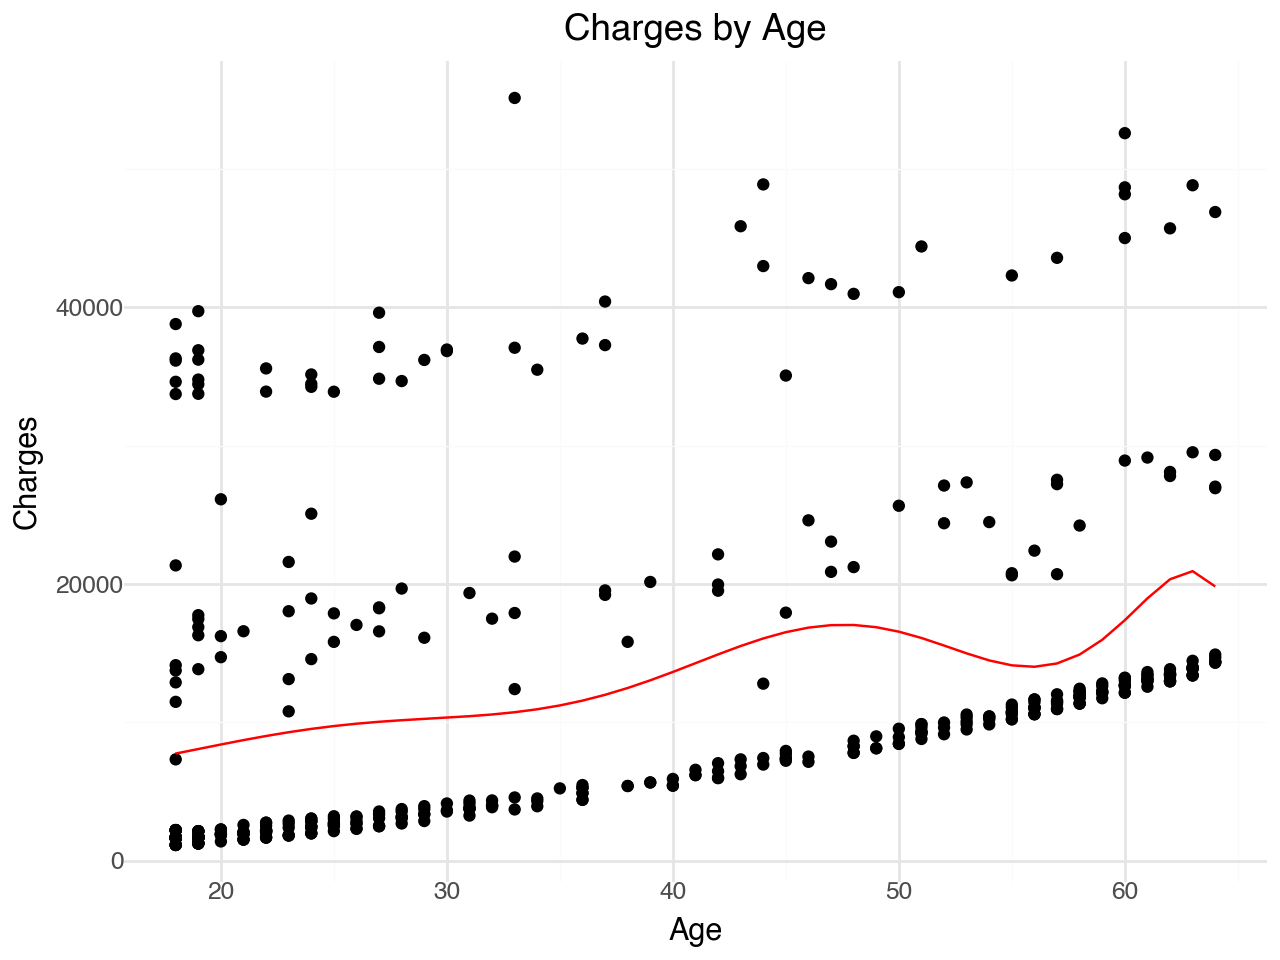

In [61]:
plot_data = pd.DataFrame({
    "age": X["age"],
    "charges": y,
    "predicted": model7.predict(X)
})

(ggplot(plot_data, aes(x = "age", y = "charges"))
    + geom_point() 
    + geom_line(aes(y = "predicted"), color = "red")
    + labs(x = "Age", y = "Charges", title = "Charges by Age")
    + theme_minimal()
    )

# Part 4: New Data

For each model, fit the model on the original data.

Then, use the fitted model to predict on the new data.

Report the MSE for each model’s new predictions. Based on this, which is the best model to use?

Make a plot showing the residuals of your final chosen model.

In [65]:
#reading in the new data
data_2 = pd.read_csv("/Users/stolieerickson/Documents/MSBA/Fall/GSB544-Computing/Labs/insurance_costs_1.csv")
#create necessary dummy variables
data_clean2 = pd.get_dummies(data_2, columns=["sex", "smoker", "region"], drop_first=True)

Model Summary (charges ~ age):
Intercept: 3611.76
Coefficient for age: 228.80
Training MSE: 126739267.91, Training R²: 0.10
Test MSE: 126739267.91, Test R²: 0.10


Model Summary (charges ~ age):
Intercept: 3611.76
Coefficient for age: 228.80
Training MSE: 126739267.91, Training R²: 0.10
Test MSE: 126739267.91, Test R²: 0.10




/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


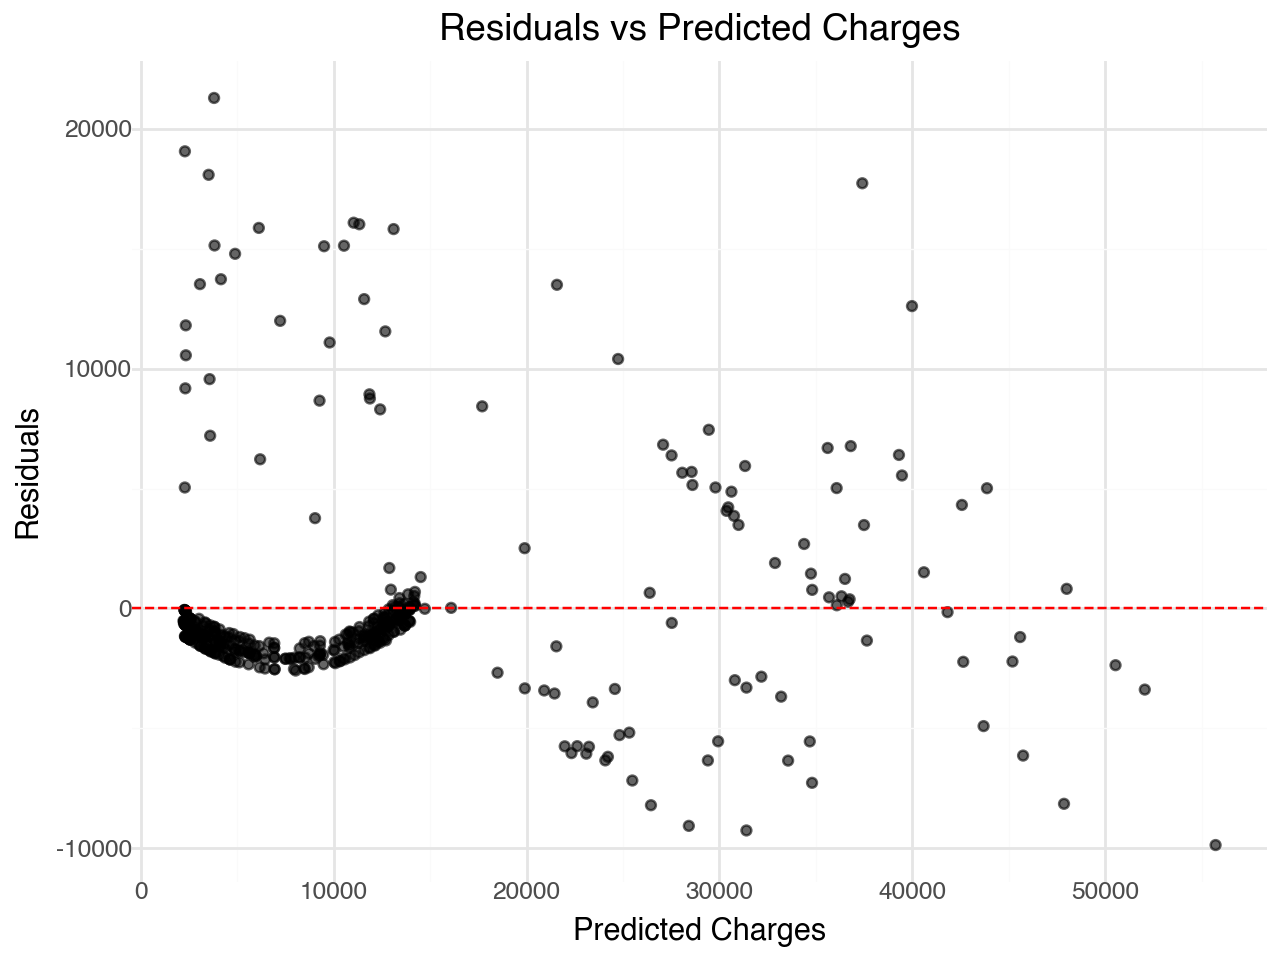

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


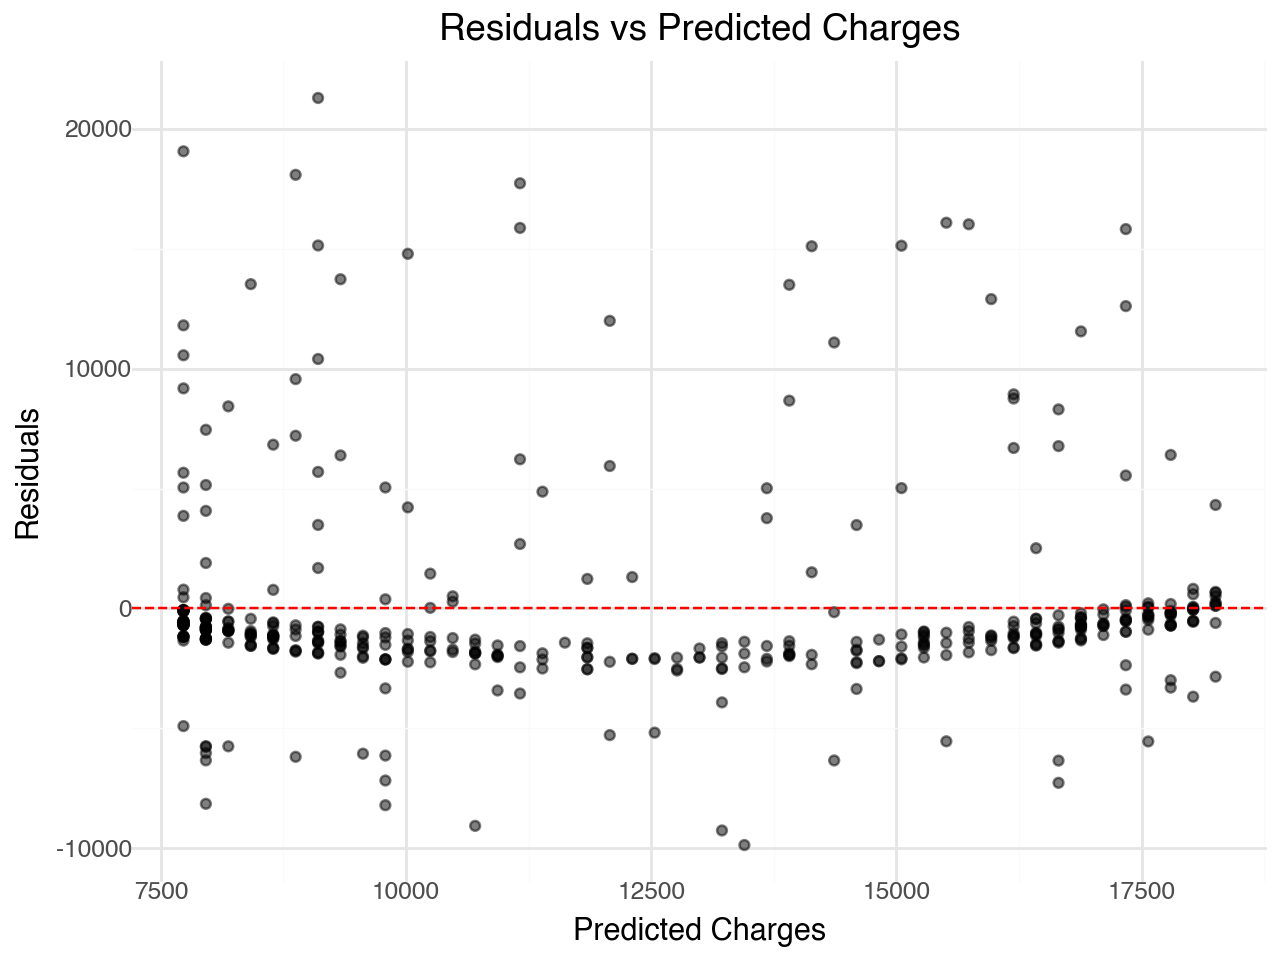

In [72]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score

def summarize_model_results(train_data, test_data, formula):
    """
    Fits a linear model on the training data, predicts on both training and test data,
    and prints out summary statistics for the model, including MSE, R², intercept, and coefficients.

    Parameters:
    - train_data: DataFrame containing the training data.
    - test_data: DataFrame containing the testing data.
    - formula: str, formula for the model (e.g., "charges ~ age" or "charges ~ age + bmi").

    Returns:
    None; prints the summary statistics.
    """
    # Fit the model on the training data
    model = smf.ols(formula=formula, data=train_data).fit()
    
    # Predict on training and testing data
    train_data['predictions'] = model.predict(train_data)
    test_data['predictions'] = model.predict(test_data)
    
    # Calculate MSE and R² for training data
    mse_train = mean_squared_error(train_data['charges'], train_data['predictions'])
    r2_train = r2_score(train_data['charges'], train_data['predictions'])
    
    # Calculate MSE and R² for testing data
    mse_test = mean_squared_error(test_data['charges'], test_data['predictions'])
    r2_test = r2_score(test_data['charges'], test_data['predictions'])
    
    # Print summary statistics
    print(f"Model Summary ({formula}):")
    print(f"Intercept: {model.params['Intercept']:.2f}")
    for coef, value in model.params.items():
        if coef != 'Intercept':
            print(f"Coefficient for {coef}: {value:.2f}")
    print(f"Training MSE: {mse_train:.2f}, Training R²: {r2_train:.2f}")
    print(f"Test MSE: {mse_test:.2f}, Test R²: {r2_test:.2f}")
    print("\n")

# Example function call for model with "age" as the predictor
summarize_model_results(data_clean, data_clean2, "charges ~ age")

Model Summary (charges ~ age + bmi):
Intercept: -4627.53
Coefficient for age: 216.30
Coefficient for bmi: 283.20
Training MSE: 123792439.58, Training R²: 0.12
Test MSE: 123792439.58, Test R²: 0.12


Model Summary (charges ~ age + bmi):
Intercept: -4627.53
Coefficient for age: 216.30
Coefficient for bmi: 283.20
Training MSE: 123792439.58, Training R²: 0.12
Test MSE: 123792439.58, Test R²: 0.12




/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


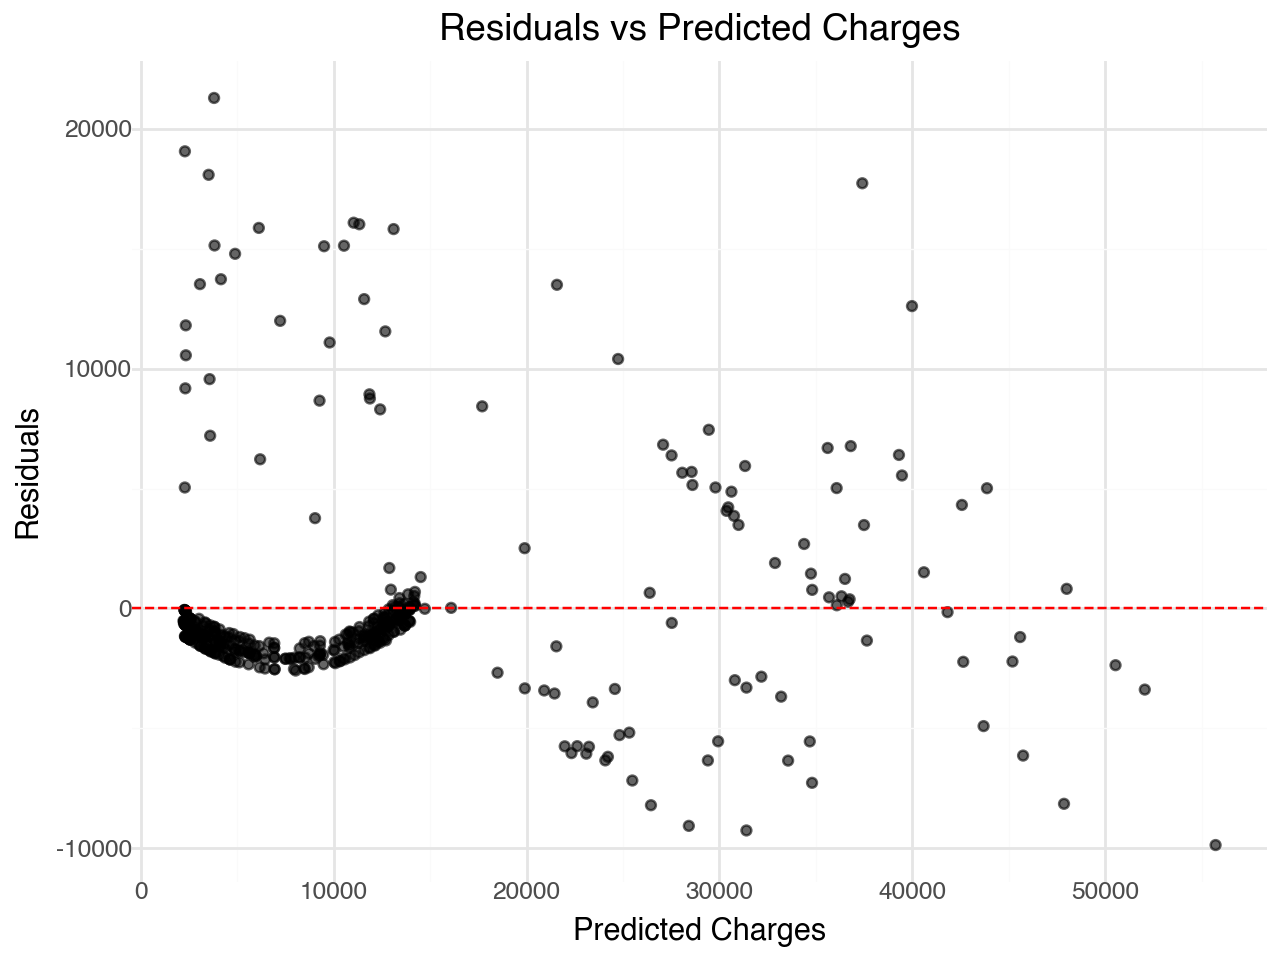

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


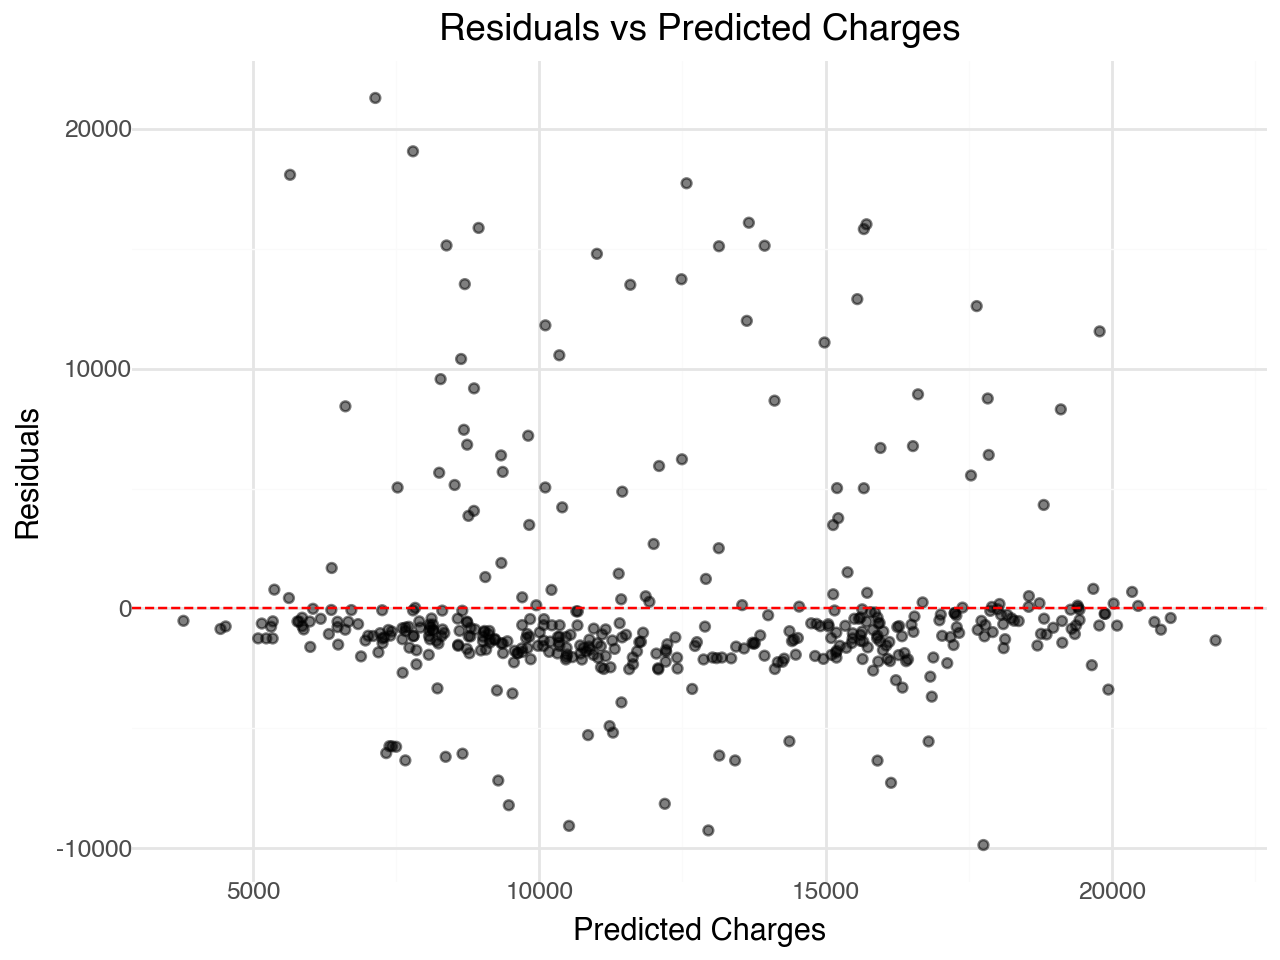

In [73]:
summarize_model_results(data_clean, data_clean2, "charges ~ age + bmi")

In [67]:
def fit_predict_model(formula, train_data, new_data, target_variable):
    """
    Fit a model based on the provided formula, make predictions on new data,
    and return the Mean Squared Error of the predictions.
    
    Parameters:
    - formula: str, the formula to specify the model.
    - train_data: DataFrame, the data to train the model on.
    - new_data: DataFrame, the new data to make predictions on.
    - target_variable: str, the name of the target variable in the DataFrames.

    Returns:
    - model: the fitted model.
    - mse: float, the Mean Squared Error of predictions.
    """
    #fit the model
    model = smf.ols(formula=formula, data=train_data).fit()
    
    #predict on new data
    new_data['predictions'] = model.predict(new_data)
    
    #calculate MSE
    mse = np.mean((new_data[target_variable] - new_data['predictions'])**2)
    
    return model, mse

#use function
formulas = [
    'charges ~ age',
    'charges ~ age + bmi',
    'charges ~ age + bmi + smoker_yes',
    'charges ~ (age + bmi):smoker_yes',
    'charges ~ (age + bmi)*smoker_yes'
]

#initialize empty results
results = {}

for formula in formulas:
    model, mse = fit_predict_model(formula, data_clean, data_clean2, 'charges')
    results[formula] = {'model': model, 'mse': mse}

#display results
for formula, result in results.items():
    print(f"Formula: {formula}, MSE: {result['mse']}")

Formula: charges ~ age, MSE: 126739267.91026388
Formula: charges ~ age + bmi, MSE: 123792439.58129103
Formula: charges ~ age + bmi + smoker_yes, MSE: 30812111.9406528
Formula: charges ~ (age + bmi):smoker_yes, MSE: 20773858.81047234
Formula: charges ~ (age + bmi)*smoker_yes, MSE: 18674284.774684444
Formula: charges ~ age, MSE: 126739267.91026388
Formula: charges ~ age + bmi, MSE: 123792439.58129103
Formula: charges ~ age + bmi + smoker_yes, MSE: 30812111.9406528
Formula: charges ~ (age + bmi):smoker_yes, MSE: 20773858.81047234
Formula: charges ~ (age + bmi)*smoker_yes, MSE: 18674284.774684444


Based on this output, the best model to use is charges ~ (age + bmi)*smoker_yes because it has the smalles MSE.

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


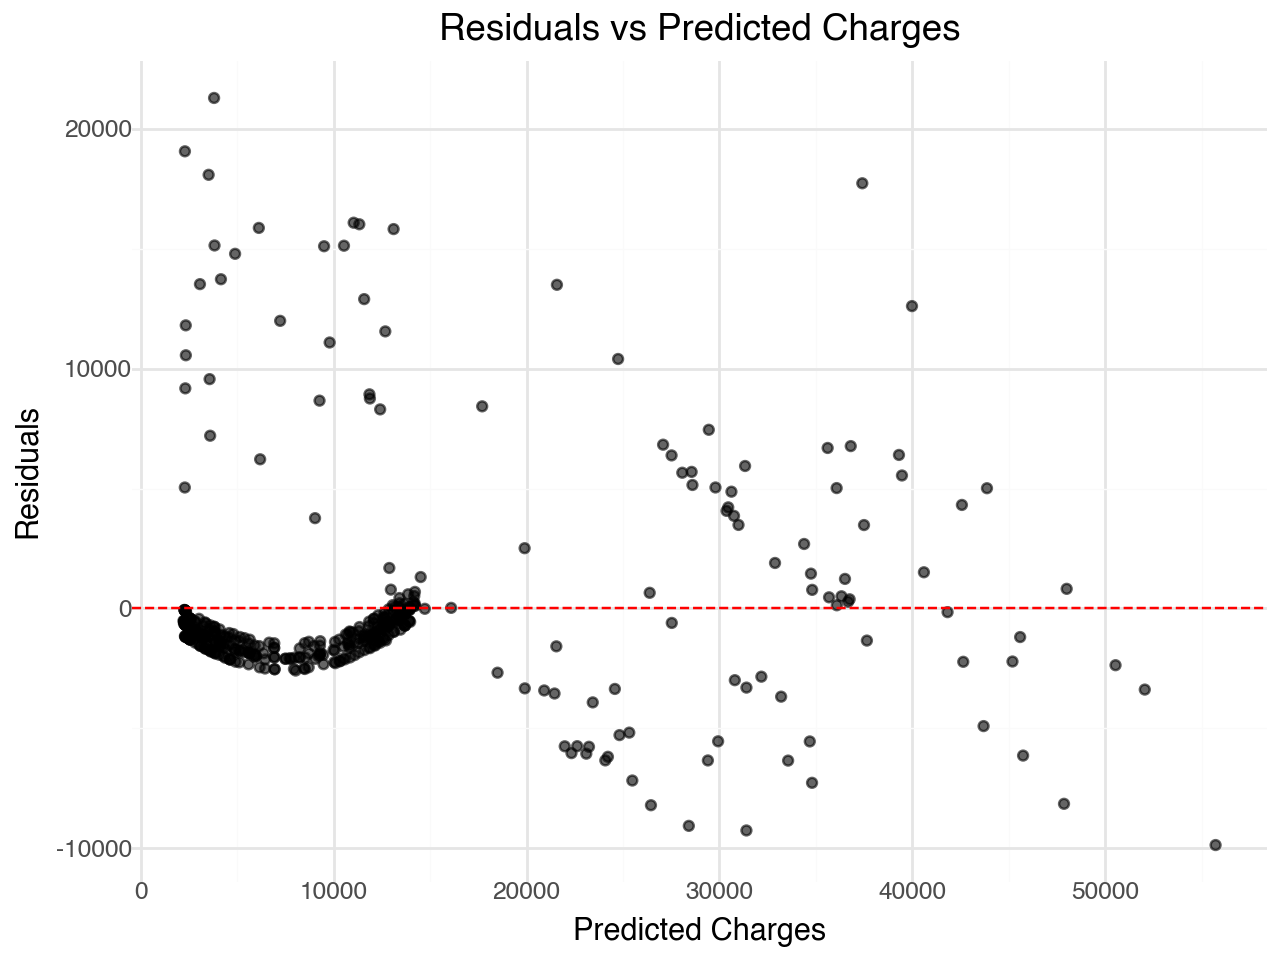

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


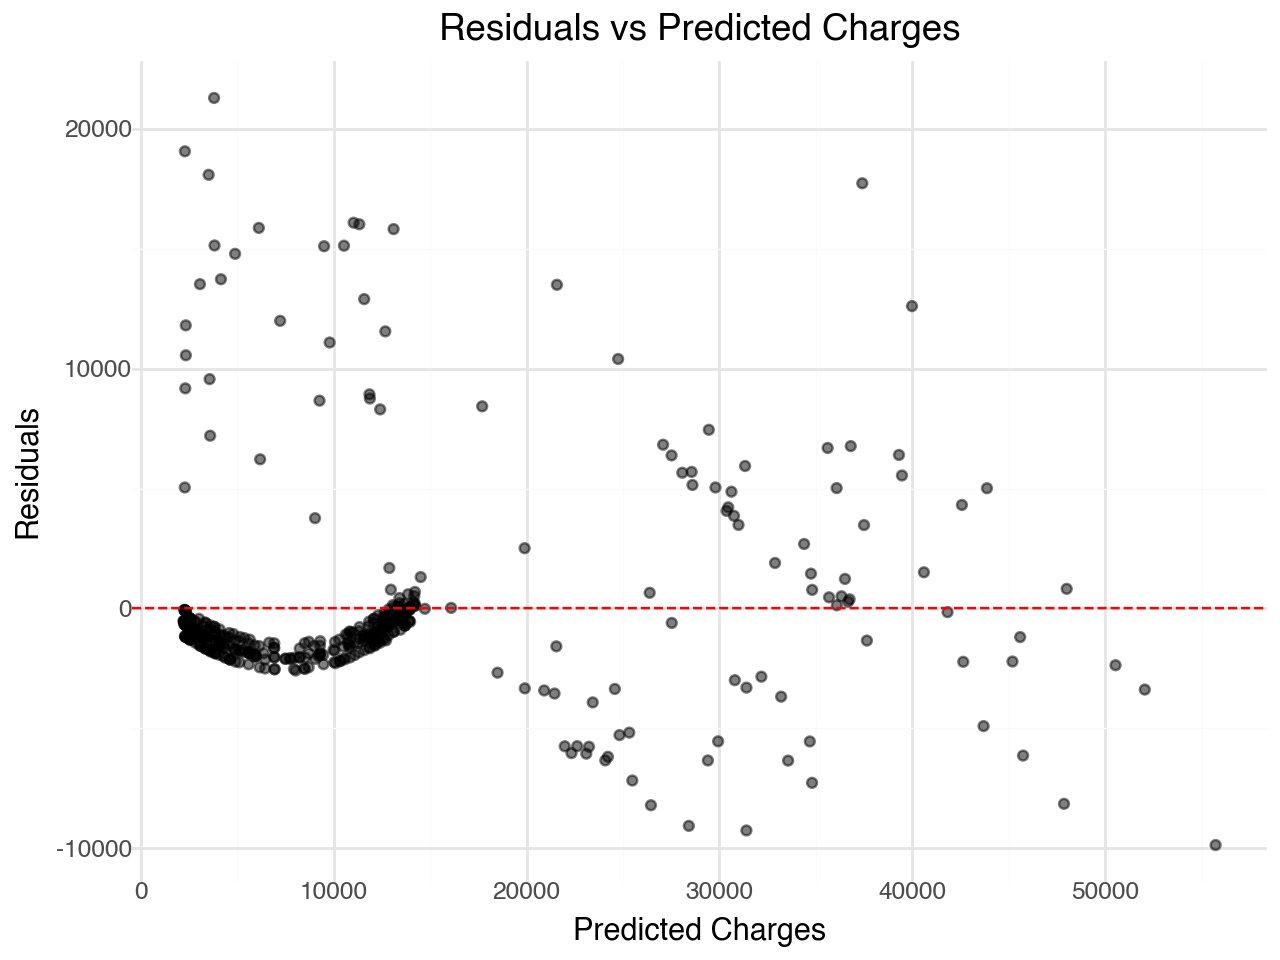

In [71]:
data_clean['predicted_charges'] = model.predict(data_clean)

# Calculate residuals
data_clean['residuals'] = data_clean['charges'] - data_clean['predicted_charges']

# Create the residual plot
residual_plot = (ggplot(data_clean, aes(x='predicted_charges', y='residuals')) +
                 geom_point(alpha=0.6) +  # Scatter plot of residuals
                 geom_hline(yintercept=0, color='red', linetype='dashed') +  # Horizontal line at y=0
                 labs(title='Residuals vs Predicted Charges',
                      x='Predicted Charges',
                      y='Residuals') +
                 theme_minimal())  

# References and Appendix

- https://www.statsmodels.org/stable/api.html
- https://www.geeksforgeeks.org/linear-regression-python-implementation/

